In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


KernelInterrupted: Execution interrupted by the Jupyter kernel.

2 5 1


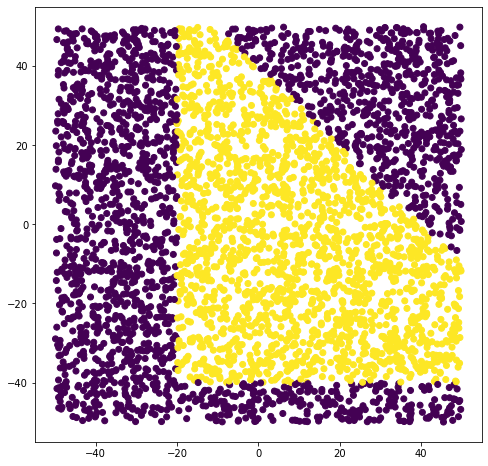

In [ ]:
import numpy as np

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


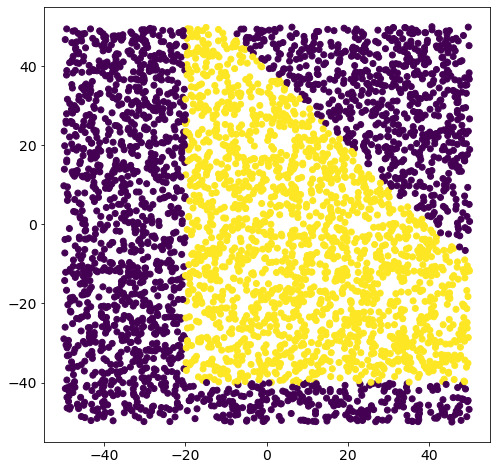

In [ ]:
import numpy as np
TYPE = 1
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of samaple
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))





Train: 3200 	 Validation: 800


In [ ]:
#ans4

#Standardization(first method)
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train1 = Rescale(x_train)
x_valid1 = Rescale(x_valid)

#min_max rescaling(secodn method)
def Rescale2(x):
  return (x - np.max(x))/( np.max(x) - np.min(x))
x_train2 = Rescale2(x_train)
x_valid2 = Rescale2(x_valid)


# x/ max(in a column)(third method)
def Rescale3(x):
  X= x.copy()
  for i in [0,1]:
    for j in range(len(X)):
      if i == 0:
        X[j, i] = X[j, i] / np.max(X[:, i])
      else :
        X[j, i] = X[j, i] / np. max(X[:, i])
  return X

x_train3 = Rescale3(x_train)
x_valid3 = Rescale3(x_valid)


fig, ax = plt.subplots(1, 3, figsize = (300, 150))
ax[0].hist(x_train1, bins = 500)
ax[0].set_title('first Rescaling method')
ax[1].hist(x_train2, bins = 500)
ax[1].set_title('second Rescalig method')
ax[2].hist(x_train3, bins = 500)
ax[2].set_title('third Rescaling method')
plt.show()


print('volatility of first : ', np.std(x_train1))
print('volatility of second : ', np.std(x_train2))
print('volatility of third : ', np.std(x_train3))

print('\n', 'the best choice of rescaling for this amount of data is the second')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Error in callback <function flush_figures at 0x7f1c615a94d0> (for post_execute):


KeyboardInterrupt: 

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [ ]:
np.random.seed(12345)
#def create_model(case = 1, optimizer = "adam", dropout_rate = 0.2, n_layers = 2,
#                 activation = 'relu', neurons = 20):
def create_DNN(case = 1):
  if case == 1:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='relu'))
      model.add(Dense(20, activation='relu'))
      model.add(Dense(20, activation='relu'))
      model.add(Dropout(0.2))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
      model.add(Dense(3, activation='sigmoid'))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  return model

#model  = create_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
#                      activation = 'relu', neurons = 20)

#model.summary()



In [ ]:
loss = 'binary_crossentropy' 
optimizer = 'adam'           
metrics = ['accuracy']
def compile_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
                      activation = 'relu', neurons = 20):
    # create the model
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=optimizer,
                metrics=['accuracy'])
    return model

model = compile_model()



In [ ]:
fit = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6817 - accuracy: 0.5741 - val_loss: 0.6726 - val_accuracy: 0.5575 - 1s/epoch - 16ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6525 - accuracy: 0.5956 - val_loss: 0.6392 - val_accuracy: 0.5725 - 122ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6054 - accuracy: 0.6425 - val_loss: 0.5984 - val_accuracy: 0.6338 - 121ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5593 - accuracy: 0.6844 - val_loss: 0.5626 - val_accuracy: 0.6513 - 118ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5328 - accuracy: 0.6994 - val_loss: 0.5391 - val_accuracy: 0.6587 - 148ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5128 - accuracy: 0.7138 - val_loss: 0.5200 - val_accuracy: 0.6825 - 131ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4981 - accuracy: 0.7216 - val_loss: 0.5054 - val_accuracy: 0.6950 - 125ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4902 - accuracy: 0.7287 - val_loss: 0.4961 - val_accuracy: 0.6975 - 132ms/epoch - 2ms/step
Epoch 9/40

In [ ]:
history = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/400
64/64 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9887 - val_loss: 0.0197 - val_accuracy: 0.9937
Epoch 2/400
64/64 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9903 - val_loss: 0.0229 - val_accuracy: 0.9937
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9887 - val_loss: 0.0229 - val_accuracy: 0.9887
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9881 - val_loss: 0.0182 - val_accuracy: 0.9962
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9853 - val_loss: 0.0222 - val_accuracy: 0.9925
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9887 - val_loss: 0.0201 - val_accuracy: 0.9950
Epoch 7/400
64/64 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0248 - val_accuracy: 0.9937
Epoch 8/400
6

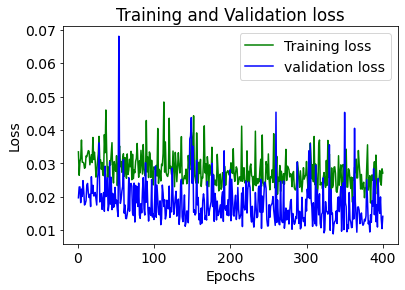

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,401)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

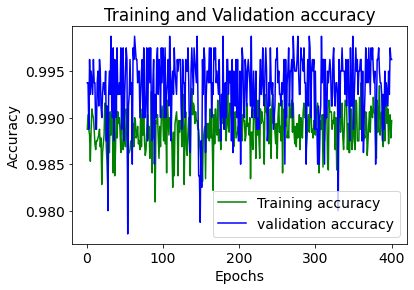

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,401)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

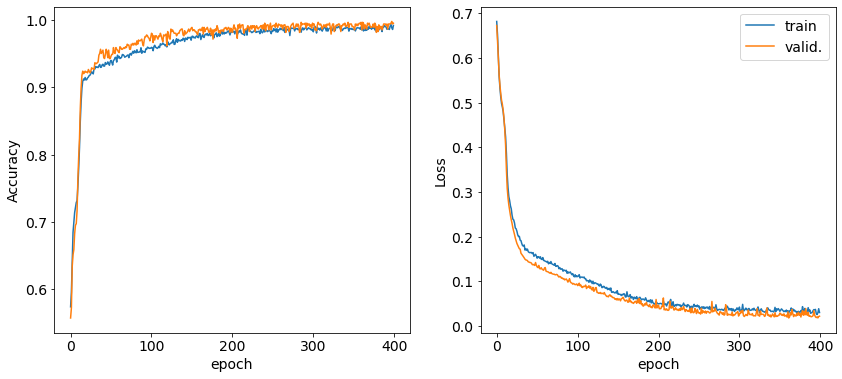

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,epochs=1, verbose=1)

#other parameters
activations = [ 'sigmoid','relu','elu']
dropout_rates = [ 0.2, 0.4, 0.6]
n_layers=[4,6,8]
neurons = [20, 25, 30]
#batch_size = [50,70,90]
#epochs = [200, 400, 500]


# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
#param_grid = dict( epochs=epochs, batch_size=batch_size)
param_grid = dict(optimizer=optimizer,activation=activations, n_layers=n_layers, neurons=neurons, dropout_rate=dropout_rates)#dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 4ms/step - loss: 0.6607 - accuracy: 0.6769 - val_loss: 0.6197 - val_accuracy: 0.7038
Best: 0.731563 using {'activation': 'sigmoid', 'dropout_rate': 0.6, 'n_layers': 8, 'neurons': 25, 'optimizer': 'RMSprop'}
0.605625 (0.076977) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'SGD'}
0.645000 (0.041674) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'RMSprop'}
0.561562 (0.040247) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'Adagrad'}
0.441250 (0.069927) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'Adadelta'}
0.589063 (0.074913) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'Adam'}
0.551250 (0.048064) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'neurons': 20, 'optimizer': 'A

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


KeyboardInterrupt: 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4431507-7850-48a0-bcb6-9c5c94fb54a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>